http://www.data-mania.com/blog/a-5-step-checklist-for-multiple-linear-regression/

In [146]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import feature_selection
from pandas.tools.plotting import scatter_matrix


In [114]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 10000

In [115]:
os.chdir(r'C:\Users\blah\Documents\Regression Module')
df = pd.read_csv("Dataset.csv")

# Basic EDA and cleaning

In [139]:
print df.shape
df.dtypes

(1242, 40)


Response                               int64
Acct_Number                            int32
Net_Sales_12 Months                  float64
Num_Website_Visit_During_Campaign      int32
Amt_Fst_Sales                        float64
State_Code                             int32
Bank_SA_Sales_3 Months               float64
Bank_Internet_Sales_3 Months         float64
Average_ATM_Transaction_Month          int64
Current_Balance                      float64
Credit Limit                         float64
Active_Since                           int64
CC_Transaction                         int64
Total_Credit_Cards                     int64
Late_Fee_Last 12 Months              float64
Interest_Earned_All_12 Months        float64
No_Enquiry_3_Months                    int64
Skymiles_12 Months                   float64
Sunday_Purchase                        int64
Num_Return_3 Months                    int64
Amt_Return_3 Months                  float64
Num_Active_Loan                        int64
Region_Clu

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
#Check for NULL, NA, NaN
print df.isnull().sum()

In [116]:
#State code is meant to be int
df['State_Code'] = df.State_Code.fillna(0)
df['State_Code'] = df.State_Code.astype(int)

#Num_Website_Visit_During_Campaign is meant to be int
df['Num_Website_Visit_During_Campaign'] = df.Num_Website_Visit_During_Campaign.fillna(0)
df['Num_Website_Visit_During_Campaign'] = df.Num_Website_Visit_During_Campaign.astype(int)

#Acct_Number is meant to be int
df['Acct_Number'] = df.Acct_Number.fillna(0)
df['Acct_Number'] = df.Acct_Number.astype(int)

In [ ]:
#checking for distribution
df.hist(figsize=(14,14), xrot=45)
plt.show()

In [ ]:
df.describe()

In [ ]:
df.describe(include=['object'])

In [ ]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y = feature, data = df)
    plt.show()

In [117]:
df['Income'] = df['Income'].replace('Hgh', 'High')

In [ ]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.boxplot(y=feature, x = 'Net_Sales_12 Months', data = df)
    plt.show()

In [ ]:
#groupby: segment by a categorical feature and then calculate a metric across all numeric features
for feature in df.dtypes[df.dtypes == 'object'].index:
    print df.groupby(feature).mean()

In [118]:
#CLEANING
df = df.drop_duplicates()

#check for unwanted observations in categorical features
for feature in df.dtypes[df.dtypes == 'object'].index:
    print df[feature].unique()
    
#Checking for missing values in numerical variables
print "_________Missing Values_________"
print df.select_dtypes(exclude=['object']).isnull().sum()


#Checking for missing values in numerical variables
print "_________Missing Values (Categorical)_________"
print df.select_dtypes(exclude=['int64','float64']).isnull().sum()

#deleting missing values
df = df.dropna()
df.shape

['South' 'West' 'North' 'East' 'Central']
['City & Surroundings' 'Metro' 'Rural' 'Suberbs']
['Single' 'Married Kids Parents' 'Single-Parents' 'Married Kids' 'Married']
['High' 'Low']
['Low' 'High']
['Low' 'High']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
_________Missing Values_________
Response                             0
Acct_Number                          0
Net_Sales_12 Months                  0
Num_Website_Visit_During_Campaign    0
Amt_Fst_Sales                        6
State_Code                           0
Bank_SA_Sales_3 Months               0
Bank_Internet_Sales_3 Months         0
Average_ATM_Transaction_Month        0
Current_Balance                      0
Credit Limit                         0
Active_Since                         0
CC_Transaction                       0
Total_Credit_Cards                   0
Late_Fee_Last 12 Months              0
Interest_Earned_All_12 Months        0
No_Enquiry_3_Months                  0
Skymiles_12 Months                   0


(1244, 32)

In [ ]:
#Checking distribution of target variables

for feature in df.dtypes[df.dtypes != 'object'].index:
    sns.boxplot(x = feature, data = df)
    plt.show()
    sns.violinplot(x = feature, data =df)
    plt.show()

#boxplot of target variable
sns.boxplot(x = 'Net_Sales_12 Months', data = df)
plt.show()

#Half of the observations fall within the the 25th and 75th percentile
sns.violinplot(x='Net_Sales_12 Months', data = df)
plt.show()

In [119]:
#Deleting outliers
#there is one row where Num_Return_3 Months is 45
df = df[df['Num_Return_3 Months'] != 45]

#there is one row in Num_Website_Visit_During_Campaign is 120
df = df[df['Num_Website_Visit_During_Campaign'] != 120]

df = df[df['Amt_Return_3 Months'].astype(int) != 30540]


In [120]:
#Getting dummies(one-hot encoding)
df = pd.get_dummies(data=df, drop_first=True)

In [ ]:
y = df['Net_Sales_12 Months']
X = df.drop(['Acct_Number','Net_Sales_12 Months'], axis=1)

In [ ]:
#State_Code
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print "X_train: ", X_train.shape
print "X_test: ", X_test.shape
print "y_train: ", y_train.shape
print "y_test: ", y_test.shape

<h2>Model 1</h2> <h3> - Basic model without testing model assumptions </h3>


In [ ]:
lm = LinearRegression()

#Train model using training set
lm.fit(X_train, y_train)

#Fit training data
y_pred_train = lm.predict(X_train)

#Fit test data
y_pred_test = lm.predict(X_test)

In [ ]:
print "Result for training data:-"
print 'R Squared: ',r2_score(y_train, y_pred_train) #(yTrue, yPred)

SS_Residual = sum((y_train-y_pred_train)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared_manual = 1-(float(SS_Residual))/SS_Total
print 'R Squared Manual: ', r_squared_manual
print 'Adjusted R-Squared: ', 1 - (1-r_squared_manual)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print 'RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'MAE:', mean_absolute_error(y_train, y_pred_train)

print "__________________________________________ \n"


print "Result for test data:-"
print 'R Squared: ',r2_score(y_test, y_pred_test) #(yTrue, yPred)

SS_Residual = sum((y_test-y_pred_test)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared_manual = 1-(float(SS_Residual))/SS_Total
print 'R Squared Manual: ', r_squared_manual
print 'Adjusted R-Squared: ', 1 - (1-r_squared_manual)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print 'RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test))
print 'MAE:', mean_absolute_error(y_test, y_pred_test)

In [ ]:
'''positive coefficient indicates that as the value of the independent variable increases, 
the mean of the dependent variable also tends to increase'''

'''A negative coefficient suggests that as the independent variable increases, 
the mean of dependent variable tends to decrease.'''

model1_coeffs = lm.coef_.astype(float)
model1_intercept = lm.intercept_.astype(float)
model1_residuals = y_test - y_pred_test

print "Model 1: Intercept (Expected mean value of y when X = 0) :", model1_intercept
print "Model 1: Coefficients: ", model1_coeffs

In [ ]:
print "___Model 1 residuals from test___ \n\n"
print model1_residuals

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.show()

#as the dependant variable's value increases error also increases

In [ ]:
#Assumption check1: Autocollinearity in residuals (Durbin-Watson test)
#checks for autocorrelation by looking at he residuals separated by some lag; here the lag is one.

DW = np.sum( np.diff( model1_residuals )**2.0 ) / SS_Residual
print 'Durbin-Watson: {:.5f}'.format( DW )


In [ ]:
#Do not execute this cell... very slow

#Assumption check2: Relationship between variables are linear and additive (check by using a scatter matrix)
temp_df = pd.read_csv("Dataset.csv")
temp_df = temp_df.select_dtypes(exclude=['object'])
temp_df = temp_df.drop('Net_Sales_12 Months', axis = 1)

scatter_matrix(temp_df, figsize=(14,14))
plt.show()

In [ ]:
#Assumption check3: Check for multicollinearity 
VIF =  1/(1-r_squared_manual)
print "VIF: ", VIF
#Multicollinearity exists

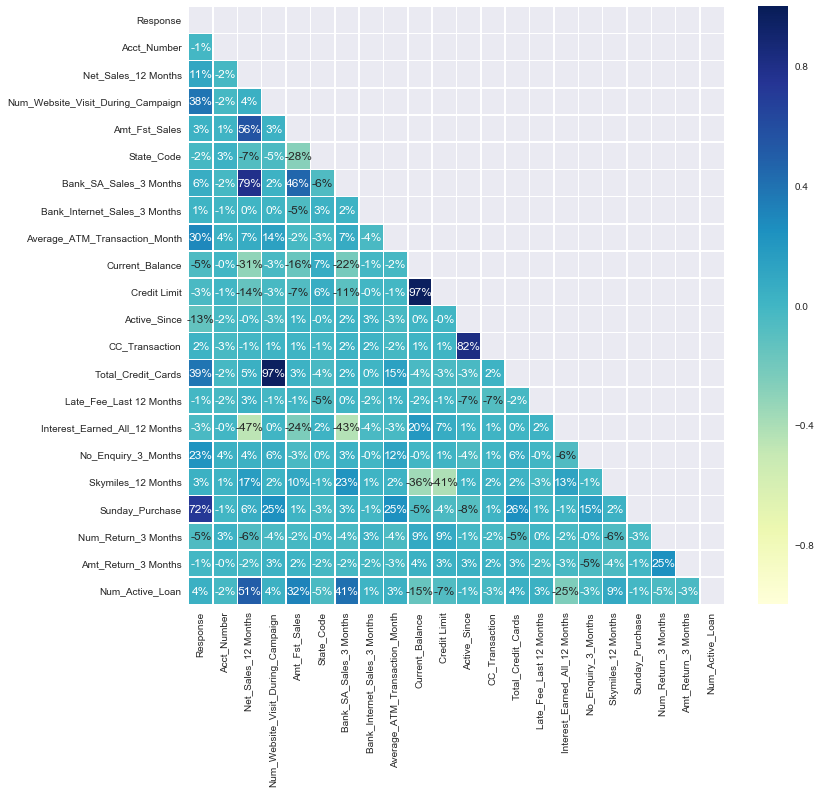

In [121]:
#Relationship between numeric and other numeric features
corr_df = df.select_dtypes(exclude=['uint8'])
correlations = corr_df.corr()

#mask the top triangle 
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#plot the figure
plt.figure(figsize=(12,11))
sns.heatmap(correlations, linewidths=0.5, cmap="YlGnBu", mask = mask, annot=True, fmt = ".0%")
plt.show()

<h2>Model 2</h2> <h3> - After removing multicollinearity</h3>

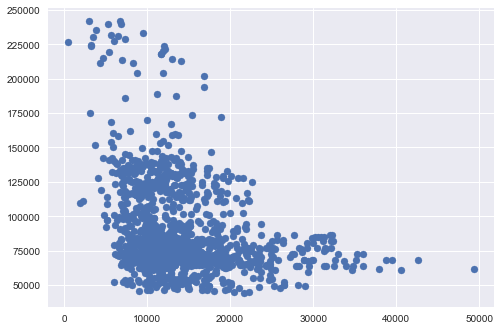

In [122]:
plt.scatter(df.Current_Balance, df['Net_Sales_12 Months'])
plt.show()


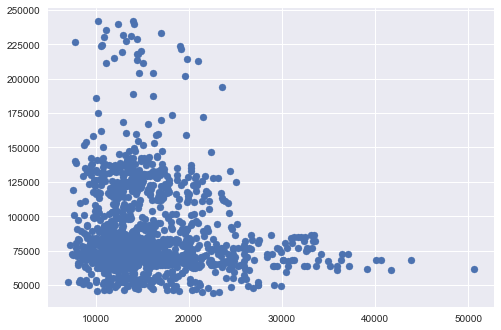

In [123]:
plt.scatter(df['Credit Limit'], df['Net_Sales_12 Months'])
plt.show()


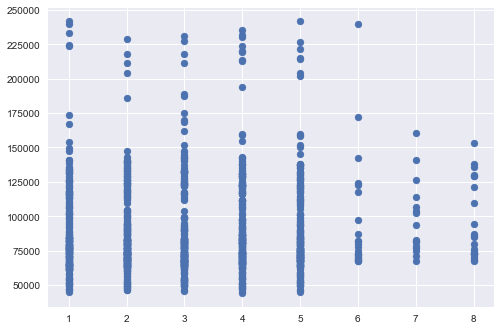

In [124]:
plt.scatter(df['Total_Credit_Cards'], df['Net_Sales_12 Months'])
plt.show()

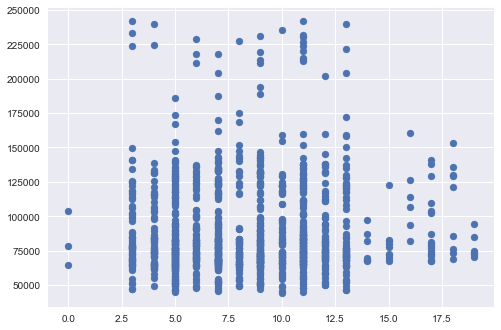

In [125]:
plt.scatter(df['Num_Website_Visit_During_Campaign'], df['Net_Sales_12 Months'])
plt.show()

In [126]:
#After looking at plots for each of highly correlated values with the y variable, following variables can be dropped
y = y = df['Net_Sales_12 Months']
X = df.drop(['Acct_Number','Net_Sales_12 Months', 'Credit Limit', 'Num_Website_Visit_During_Campaign'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)
print "X_train: ", X_train.shape
print "X_test: ", X_test.shape
print "y_train: ", y_train.shape
print "y_test: ", y_test.shape

X_train:  (869, 36)
X_test:  (373, 36)
y_train:  (869L,)
y_test:  (373L,)


In [127]:
X.head()

,Response,Amt_Fst_Sales,State_Code,Bank_SA_Sales_3 Months,Bank_Internet_Sales_3 Months,Average_ATM_Transaction_Month,Current_Balance,Active_Since,CC_Transaction,Total_Credit_Cards,Late_Fee_Last 12 Months,Interest_Earned_All_12 Months,No_Enquiry_3_Months,Skymiles_12 Months,Sunday_Purchase,Num_Return_3 Months,Amt_Return_3 Months,Num_Active_Loan,Region_Cluster_East,Region_Cluster_North,Region_Cluster_South,Region_Cluster_West,Urbanity_Metro,Urbanity_Rural,Urbanity_Suberbs,Life Stage_Married Kids,Life Stage_Married Kids Parents,Life Stage_Single,Life Stage_Single-Parents,Income_Low,Net_Worth_Low,High_LTV_Customer_Low,Major_Banking_With_Us_Yes,Mail_channel_Prefer_Yes,Heavy_Web_User_Yes,Relationship_Mgr_Assigned_Yes
0,0,5478.217189,6,959.20,63.821080,7,8983.529811,1221,33,1,0.000000,5.1948,1,106.549462,0,1,2220.0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0
1,0,9630.488199,3,10543.00,95.093768,5,13602.814310,1575,35,1,0.000000,4.1500,11,102.680500,0,0,0.0,6,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0
2,0,2561.220838,8,1233.00,82.223340,4,29963.139480,2475,55,3,79.166758,5.7700,12,99.237800,0,3,7770.0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0
3,0,180.811876,8,2678.00,383.618784,2,14433.580870,1110,37,5,0.000000,3.6900,7,102.103400,0,0,0.0,2,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,1,1
4,0,2642.531830,8,1076.66,27.940056,7,9264.245877,1932,69,3,78.183293,7.5240,10,106.653993,0,0,0.0,3,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0


In [129]:
lm2 = LinearRegression()

#Train model using training set
lm2.fit(X_train, y_train)

#Fit training data
y_pred_train = lm2.predict(X_train)

#Fit test data
y_pred_test = lm2.predict(X_test)

print "Result for training data:-"
print 'R Squared: ',r2_score(y_train, y_pred_train) #(yTrue, yPred)

SS_Residual = sum((y_train-y_pred_train)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared_manual = 1-(float(SS_Residual))/SS_Total
print 'R Squared Manual: ', r_squared_manual
print 'Adjusted R-Squared: ', 1 - (1-r_squared_manual)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print 'RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train))
print 'MAE:', mean_absolute_error(y_train, y_pred_train)

print "__________________________________________ \n"


print "Result for test data:-"
print 'R Squared: ',r2_score(y_test, y_pred_test) #(yTrue, yPred)

SS_Residual = sum((y_test-y_pred_test)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared_manual = 1-(float(SS_Residual))/SS_Total
print 'R Squared Manual: ', r_squared_manual
print 'Adjusted R-Squared: ', 1 - (1-r_squared_manual)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print 'RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test))
print 'MAE:', mean_absolute_error(y_test, y_pred_test)



#Both Training and test errors have increased because of variable reduction

Result for training data:-
R Squared:  0.745038755954
R Squared Manual:  0.745038755954
Adjusted R-Squared:  0.734006779048
RMSE:  17178.4369648
MAE: 12951.9757421
__________________________________________ 

Result for test data:-
R Squared:  0.6887480631
R Squared Manual:  0.6887480631
Adjusted R-Squared:  0.65539964129
RMSE:  18276.6424693
MAE: 13718.7189024


In [134]:
model2_coeffs = lm2.coef_.astype(float)
model2_intercept = lm2.intercept_.astype(float)
model2_residuals = y_test - y_pred_test

print "Model 2: Intercept (Expected mean value of y when X = 0) :", model2_intercept
print "Model 2: Coefficients: ", model2_coeffs

Model 2: Intercept (Expected mean value of y when X = 0) : 105188.884224
Model 2: Coefficients:  [  7.59567124e+03   2.43601897e+00   6.41164604e+02   8.97478700e+00
  -5.27217283e+00   2.27970309e+02  -5.76888633e-01   1.89287102e+00
  -7.89804131e+01  -3.36049780e+02   1.38002673e+01  -2.92800719e+03
   1.49280002e+02  -2.68691715e+02   1.93530292e+00  -1.73725269e+03
   5.85748694e-09   3.05011622e+03  -5.97499286e+03  -4.32953335e+03
  -7.19959629e+03  -6.40787513e+03  -9.18575331e+02   2.55969833e+03
  -7.67996321e+02   4.58149467e+02  -2.16171307e+03  -5.29165740e+02
   1.92763236e+03   3.42024366e+02   1.59012873e+03  -2.07597803e+03
  -1.04147317e+03   5.77880036e+02  -6.77985012e+02   7.85407179e+02]


In [135]:
DW = np.sum( np.diff( model2_residuals )**2.0 ) / SS_Residual
print 'Durbin-Watson for Autocollinearity : {:.5f}'.format( DW )

VIF =  1/(1-r_squared_manual)
print "VIF: ", VIF
#Multicollinearity exists

Durbin-Watson for Autocollinearity : 2.00850
VIF:  3.21283141227


<h2>Model 3</h2> <h3> - Selecting variables using stepwise regression</h3>

In [155]:
import statsmodels.api as sm
X2_test = sm.add_constant(X_test)

In [156]:
est = sm.OLS(y_test, X2_test)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                            
Dep. Variable:     Net_Sales_12 Months   R-squared:                       0.731
Model:                             OLS   Adj. R-squared:                  0.702
Method:                  Least Squares   F-statistic:                     25.31
Date:                 Fri, 09 Mar 2018   Prob (F-statistic):           4.71e-75
Time:                         18:45:12   Log-Likelihood:                -4162.7
No. Observations:                  373   AIC:                             8399.
Df Residuals:                      336   BIC:                             8545.
Df Model:                           36                                         
Covariance Type:             nonrobust                                         
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
